# BIRD SPECIES PREDICTION

# Importig libraries

In [36]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import pandas as pd 
import os
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.preprocessing.image import array_to_img, img_to_array
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

# Visualizing some of the images

In [37]:
# plt.figure(figsize=(12, 12))
# # path = '../datasets/Bird Speciees Dataset/AMERICAN GOLDFINCH'  ###This was original
# path = '../datasets/cats_and_dogs/Cat' 
# for i in range(1, 17):
#     plt.subplot(4, 4, i)
#     plt.tight_layout()
#     image_rand = imread(path + "/" + random.choice(sorted(listdir(path))))
#     plt.xlabel(image_rand.shape[0])
#     plt.ylabel(image_rand.shape[1])
#     plt.imshow(image_rand)
    

In [38]:
# image_rand.shape

# Creating the path to the dataset dir and lists for the images and labels

In [39]:
# dir = "../datasets/Bird Speciees Dataset"  ###This was original
dir_path = "../datasets/cats_and_dogs"
root_dir = listdir(dir_path)
image_list, label_list = [], []

# Converting the images to array and appending them and thier corresponding labels to their list

In [40]:
for directory in root_dir:
    print("Yeah nigga")
    path_to_images = os.path.join(dir_path, directory)
    cats_and_dogs_list = listdir(path_to_images)
    counter = 0
    for file in cats_and_dogs_list:
        file_path = f"{path_to_images}/{file}"
        if not file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Validate image file extensions
            continue  # Skip non-image files
        
        image = cv2.imread(file_path)  # Read the image
        if image is None:
            continue  # Skip if the image couldn't be read
        
        # **Step 1: Resize the image to (224, 224)**
        image = cv2.resize(image, (224, 224))  # Resize to the required dimensions

        # **Step 2: Ensure all images have 3 channels (RGB)**
        if len(image.shape) == 2:  # Check if the image is grayscale
            image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)  # Convert grayscale to RGB

        # **Step 3: Normalize the pixel values to the range [0, 1]**
        image = image / 255.0  # Normalize the pixel values

        # Convert to array
        array_image = img_to_array(image)  # Convert to a NumPy array
        image_list.append(array_image)  # Add the reshaped image to the list
        label_list.append(directory)  # Add the corresponding label

        
    # dir_path = os.path.join(dir_path, directory)  # Construct directory path
    # dir_path = listdir(dir_path)
    # print(dir_path)
    # if not os.path.isdir(dir_path):
    #     continue  # Skip if not a valid directory
    
    # print("This is it")
    
    # for file in os.listdir(dir_path):
    #     file_path = os.path.join(dir_path, file)  # Full file path
        # if not file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Validate image file extensions
        #     continue  # Skip non-image files
        
        # image = cv2.imread(file_path)  # Read the image
        # if image is None:
        #     continue  # Skip if the image couldn't be read
        
        # # **Step 1: Resize the image to (224, 224)**
        # image = cv2.resize(image, (224, 224))  # Resize to the required dimensions

        # # **Step 2: Ensure all images have 3 channels (RGB)**
        # if len(image.shape) == 2:  # Check if the image is grayscale
        #     image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)  # Convert grayscale to RGB

        # # **Step 3: Normalize the pixel values to the range [0, 1]**
        # image = image / 255.0  # Normalize the pixel values

        # # Convert to array
        # array_image = img_to_array(image)  # Convert to a NumPy array
        # image_list.append(array_image)  # Add the reshaped image to the list
        # label_list.append(directory)  # Add the corresponding label


Yeah nigga
Yeah nigga


# Checking total items in the label list

In [41]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

0  
Cat    12469
Dog    12444
Name: count, dtype: int64

# Checking number of classes that we will be working with

In [42]:
class_num = len(label_counts)
class_num

2

# Checking the shapes of the images in the list

In [43]:
image_list[0].shape

(224, 224, 3)

# Spliting the dataset for training and testing sets

In [44]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=10)

In [45]:
total = 0
for i, img in enumerate(x_test):
    if img.shape != (224, 224, 3):
        print(f"{i} image is not in same shape as {img.shape}")
        total = total + 1
print(f"THERE ARE {total} IMAGES THAT ARE OUT OF THE SHAPE")
    


THERE ARE 0 IMAGES THAT ARE OUT OF THE SHAPE


# Normalizing the data by dividing it to 255 and reshaping it

In [46]:
x_train = np.array(x_train, dtype=np.float32)
x_test = np.array(x_test, dtype=np.float32) 
x_train = x_train.reshape(-1, 224, 224, 3)
x_test = x_test.reshape(-1, 224, 224, 3)

# Binarlizing the y data by using one hot encoder

In [47]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

# Spliting the training set int train and validation set

In [48]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=10)

MemoryError: Unable to allocate 8.94 GiB for an array with shape (15944, 224, 224, 3) and data type float32

# Creating the CNN architecture 

In [ ]:
model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(3, 3), padding="same", input_shape=(224, 224, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=3, strides=3))
model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 74, 74, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 37, 37, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 37, 37, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │       331,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337,873 (1.29 MB)

 Trainable params: 337,873 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

# Compiling the model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0005), metrics=['Accuracy'])

# Training the model

In [ ]:
epochs = 25
batch_size = 750

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 275s 11s/step - Accuracy: 0.5010 - loss: 0.0000e+00 - val_Accuracy: 0.5033 - val_loss: 0.0000e+00
Epoch 2/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 216s 9s/step - Accuracy: 0.4967 - loss: 0.0000e+00 - val_Accuracy: 0.5033 - val_loss: 0.0000e+00
Epoch 3/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 208s 8s/step - Accuracy: 0.4985 - loss: 0.0000e+00 - val_Accuracy: 0.5033 - val_loss: 0.0000e+00
Epoch 4/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 273s 9s/step - Accuracy: 0.4982 - loss: 0.0000e+00 - val_Accuracy: 0.5033 - val_loss: 0.0000e+00
Epoch 5/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 292s 11s/step - Accuracy: 0.5079 - loss: 0.0000e+00 - val_Accuracy: 0.5033 - val_loss: 0.0000e+00
Epoch 6/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 314s 13s/step - Accuracy: 0.5041 - loss: 0.0000e+00 - val_Accuracy: 0.5033 - val_loss: 0.0000e+00
Epoch 7/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 359s 15s/step - Accuracy: 0.5003 - loss: 0.0000e+00 - val_Accuracy: 0.5033 - val_loss: 0.0000e+00
Epoch 8/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 207s 8s/step 

# Evaluating the model performance

In [ ]:
scores = model.evaluate(x_test, y_test)

156/156 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - Accuracy: 0.5064 - loss: 0.0000e+00


In [ ]:
print(f"Test accuracy is {scores[1]*100}")

Test accuracy is 50.4314661026001


# Storing Predictions

In [ ]:
y_pred = model.predict(x_test)

156/156 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step


# Storing image that further will be used for prection

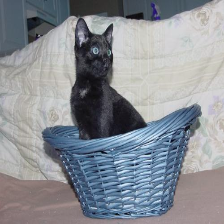

In [ ]:
img = array_to_img(x_test[1500])
img

# The prediction

In [ ]:
print(f"The original is {lb.inverse_transform(y_test[3000].reshape(1, -1))}")
print(f"THe predicted is {lb.inverse_transform(y_pred[3000].reshape(1, -1))}")

The original is ['Dog']
THe predicted is ['Cat']


In [ ]:
for animal in y_pred:
    print(f"The animal is {lb.inverse_transform(animal)}")

The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal is ['Cat']
The animal

# Checking the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
y_test_original = lb.inverse_transform(y_test)  # Reverse binarization
y_pred_original = lb.inverse_transform(y_pred)  # Reverse prediction binarization (if applicable)

# Calculate confusion matrix
cm = confusion_matrix(y_test_original, y_pred_original)
print(cm)

[[2494]]


c:\Users\DELL\Desktop\MachineLearning\SpecialForCreatingModel\env_ForCreatingModel\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


# Saving the model

In [ ]:
# model.save("../datasets/cat_and_dog_predict.h5")